In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as stats

In [6]:
masterfile = './Data/Master.csv'
master_df = pd.read_csv(masterfile)
master_df.head()
small_df = master_df[['playerID','bats', 'throws']]
small_df = small_df.dropna(axis=0, how='any')
small_df

,playerID,bats,throws
0,aardsda01,R,R
1,aaronha01,R,R
2,aaronto01,R,R
3,aasedo01,R,R
4,abadan01,L,L
5,abadfe01,L,L
6,abadijo01,R,R
7,abbated01,R,R
8,abbeybe01,R,R
9,abbeych01,L,L


In [7]:
small_df['bats'].value_counts()

R    11544
L     4836
B     1151
Name: bats, dtype: int64

In [8]:
small_df['throws'].value_counts()

R    14004
L     3527
Name: throws, dtype: int64

In [9]:
battingfile = './Data/Batting.csv'
batting_df = pd.read_csv(battingfile)
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [16]:
batfile = batting_df[['playerID', 'AB', 'R', 'H']]
batfile = batfile.groupby('playerID').mean()
batfile

,AB,R,H
playerID,,,
aardsda01,0.444444,0.000000,0.000000
aaronha01,537.565217,94.521739,163.956522
aaronto01,134.857143,14.571429,30.857143
aasedo01,2.500000,0.000000,0.000000
abadan01,7.000000,0.333333,0.666667
abadfe01,1.333333,0.000000,0.166667
abadijo01,24.500000,2.000000,5.500000
abbated01,304.400000,35.500000,77.200000
abbeybe01,37.500000,3.500000,6.333333


In [17]:
combined_df = pd.merge(small_df, batfile, on = 'playerID', how = 'right')
combined_df

,playerID,bats,throws,AB,R,H
0,aardsda01,R,R,0.444444,0.000000,0.000000
1,aaronha01,R,R,537.565217,94.521739,163.956522
2,aaronto01,R,R,134.857143,14.571429,30.857143
3,aasedo01,R,R,2.500000,0.000000,0.000000
4,abadan01,L,L,7.000000,0.333333,0.666667
5,abadfe01,L,L,1.333333,0.000000,0.166667
6,abadijo01,R,R,24.500000,2.000000,5.500000
7,abbated01,R,R,304.400000,35.500000,77.200000
8,abbeybe01,R,R,37.500000,3.500000,6.333333
9,abbeych01,L,L,350.200000,61.400000,98.400000


In [18]:
combined_df = combined_df.dropna(axis=0, how='any')
combined_df

,playerID,bats,throws,AB,R,H
0,aardsda01,R,R,0.444444,0.000000,0.000000
1,aaronha01,R,R,537.565217,94.521739,163.956522
2,aaronto01,R,R,134.857143,14.571429,30.857143
3,aasedo01,R,R,2.500000,0.000000,0.000000
4,abadan01,L,L,7.000000,0.333333,0.666667
5,abadfe01,L,L,1.333333,0.000000,0.166667
6,abadijo01,R,R,24.500000,2.000000,5.500000
7,abbated01,R,R,304.400000,35.500000,77.200000
8,abbeybe01,R,R,37.500000,3.500000,6.333333
9,abbeych01,L,L,350.200000,61.400000,98.400000


In [32]:
combined_df = combined_df.loc[combined_df['AB']>0, :]
combined_df = combined_df.loc[combined_df['H']>0, :]

In [33]:
combined_df["batting average"] = combined_df['H']/combined_df['AB']
combined_df["Productivity"] = combined_df['R']/combined_df['H']
combined_df

,playerID,bats,throws,AB,R,H,batting average,Productivity
1,aaronha01,R,R,537.565217,94.521739,163.956522,0.304998,0.576505
2,aaronto01,R,R,134.857143,14.571429,30.857143,0.228814,0.472222
4,abadan01,L,L,7.000000,0.333333,0.666667,0.095238,0.500000
5,abadfe01,L,L,1.333333,0.000000,0.166667,0.125000,0.000000
6,abadijo01,R,R,24.500000,2.000000,5.500000,0.224490,0.363636
7,abbated01,R,R,304.400000,35.500000,77.200000,0.253614,0.459845
8,abbeybe01,R,R,37.500000,3.500000,6.333333,0.168889,0.552632
9,abbeych01,L,L,350.200000,61.400000,98.400000,0.280982,0.623984
10,abbotda01,R,R,7.000000,0.000000,1.000000,0.142857,0.000000
11,abbotfr01,R,R,171.000000,16.000000,35.666667,0.208577,0.448598


In [37]:
combined_df.describe()

,AB,R,H,batting average,Productivity
count,13365.000000,13365.000000,13365.000000,13365.000000,13365.000000
mean,113.420922,14.329990,28.706082,0.222719,0.496365
std,129.484426,19.078400,36.199424,0.097115,0.424931
min,0.076923,0.000000,0.058824,0.015873,0.000000
25%,15.500000,1.000000,2.500000,0.168831,0.363636
50%,52.200000,5.000000,11.000000,0.229630,0.472332
75%,179.000000,21.000000,44.727273,0.262443,0.568846
max,603.666667,120.714286,192.000000,1.000000,25.000000


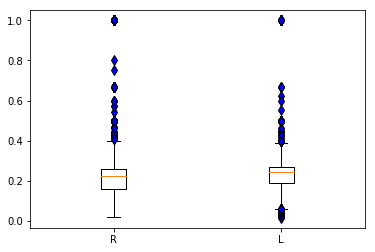

In [34]:
hands = ['R', 'L']
batting_average = [[] for i in hands]
productivity = [[] for i in hands]

for hand in hands:

    temp_df = combined_df.loc[combined_df['bats'] == hand,:]
    
    #for i in temp_df['batting average']:
        #batting_average[hands.index(hand)].append(i)
    for index, row in temp_df.iterrows():
        batting_average[hands.index(hand)].append(row["batting average"])
        productivity[hands.index(hand)].append(row["Productivity"])
        
        
        

flierprops = {'marker': 'd','markerfacecolor': 'blue','markersize':7}



plt.boxplot(batting_average,labels = hands,flierprops = flierprops)

plt.show()

In [35]:
stats.ttest_ind(batting_average[0],batting_average[1],equal_var = False)

Ttest_indResult(statistic=-8.587512468688194, pvalue=1.049549016688599e-17)

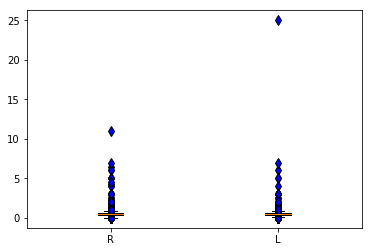

In [36]:
plt.boxplot(productivity,labels = hands,flierprops = flierprops)
plt.show()